In [37]:
# Untuk Pengolahan Kata
from transformers import pipeline
import emoji
import re
import nltk
from nltk.corpus import stopwords, words
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Untuk pre processing data
from sklearn.model_selection import train_test_split

# Untuk Pemodelan
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Untuk Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [38]:
df = pd.read_csv("./reviews_ovo.csv")

In [39]:
df

,Nama,Rating,Komentar,Tanggal
0,Pengguna Google,1,Adminya edan,2025-03-27 16:10:41
1,Pengguna Google,1,aplikasi keuangan terburuk. sering eror dan ga...,2025-03-27 15:53:31
2,Pengguna Google,2,pusat bantuan gak jelas,2025-03-27 15:52:27
3,Pengguna Google,1,gak bisa Upgrade ke akun premier,2025-03-27 15:41:02
4,Pengguna Google,1,"aplikasi sangat sulit dibuka, loading mulu",2025-03-27 15:32:36
...,...,...,...,...
274495,Pengguna Google,5,Bagus bgtt,2021-01-06 20:21:07
274496,Pengguna Google,5,Sangat membantu..,2021-01-06 20:16:49
274497,Pengguna Google,1,Apa apaan ini ko gak bisa masuk akun gagal terus,2021-01-06 20:06:11
274498,Pengguna Google,2,Awal nya aplikasi ini bagus tapi waktu update ...,2021-01-06 20:05:32


In [40]:
### Proses EDA

In [41]:
print(df.isna().sum())
print(df.isnull().sum())
print(df.duplicated().sum())

Nama        0
Rating      0
Komentar    3
Tanggal     0
dtype: int64
Nama        0
Rating      0
Komentar    3
Tanggal     0
dtype: int64
3


In [42]:
df.drop_duplicates(inplace=True)
df = df.replace(r'^\s*$', np.nan, regex=True)  # Hapus kolom yang semua nilainya NaN
df

,Nama,Rating,Komentar,Tanggal
0,Pengguna Google,1,Adminya edan,2025-03-27 16:10:41
1,Pengguna Google,1,aplikasi keuangan terburuk. sering eror dan ga...,2025-03-27 15:53:31
2,Pengguna Google,2,pusat bantuan gak jelas,2025-03-27 15:52:27
3,Pengguna Google,1,gak bisa Upgrade ke akun premier,2025-03-27 15:41:02
4,Pengguna Google,1,"aplikasi sangat sulit dibuka, loading mulu",2025-03-27 15:32:36
...,...,...,...,...
274495,Pengguna Google,5,Bagus bgtt,2021-01-06 20:21:07
274496,Pengguna Google,5,Sangat membantu..,2021-01-06 20:16:49
274497,Pengguna Google,1,Apa apaan ini ko gak bisa masuk akun gagal terus,2021-01-06 20:06:11
274498,Pengguna Google,2,Awal nya aplikasi ini bagus tapi waktu update ...,2021-01-06 20:05:32


In [43]:
df.dropna(subset=['Komentar'], inplace=True)
df

,Nama,Rating,Komentar,Tanggal
0,Pengguna Google,1,Adminya edan,2025-03-27 16:10:41
1,Pengguna Google,1,aplikasi keuangan terburuk. sering eror dan ga...,2025-03-27 15:53:31
2,Pengguna Google,2,pusat bantuan gak jelas,2025-03-27 15:52:27
3,Pengguna Google,1,gak bisa Upgrade ke akun premier,2025-03-27 15:41:02
4,Pengguna Google,1,"aplikasi sangat sulit dibuka, loading mulu",2025-03-27 15:32:36
...,...,...,...,...
274495,Pengguna Google,5,Bagus bgtt,2021-01-06 20:21:07
274496,Pengguna Google,5,Sangat membantu..,2021-01-06 20:16:49
274497,Pengguna Google,1,Apa apaan ini ko gak bisa masuk akun gagal terus,2021-01-06 20:06:11
274498,Pengguna Google,2,Awal nya aplikasi ini bagus tapi waktu update ...,2021-01-06 20:05:32


In [44]:
print(df.isna().sum())
print(df.isnull().sum())
print(df.duplicated().sum())

Nama        0
Rating      0
Komentar    0
Tanggal     0
dtype: int64
Nama        0
Rating      0
Komentar    0
Tanggal     0
dtype: int64
0


In [45]:
def map_rating_to_sentiment(rating):
  """Memetakan rating numerik ke label sentimen.

  Args:
    rating: Nilai rating (misalnya, 1-5).

  Returns:
    Label sentimen ("positive", "negative", atau "neutral").
  """
  if rating < 3:
    return "negative"
  elif rating == 3:
    return "neutral"
  else:
    return "positive"

# Terapkan fungsi pada kolom 'Rating' dan simpan hasilnya di kolom baru 'Sentiment'
df['Sentiment'] = df['Rating'].apply(map_rating_to_sentiment)

print(df)

                   Nama  Rating  \
0       Pengguna Google       1   
1       Pengguna Google       1   
2       Pengguna Google       2   
3       Pengguna Google       1   
4       Pengguna Google       1   
...                 ...     ...   
274495  Pengguna Google       5   
274496  Pengguna Google       5   
274497  Pengguna Google       1   
274498  Pengguna Google       2   
274499  Pengguna Google       5   

                                                 Komentar  \
0                                            Adminya edan   
1       aplikasi keuangan terburuk. sering eror dan ga...   
2                                 pusat bantuan gak jelas   
3                        gak bisa Upgrade ke akun premier   
4              aplikasi sangat sulit dibuka, loading mulu   
...                                                   ...   
274495                                         Bagus bgtt   
274496                                  Sangat membantu..   
274497   Apa apaan ini ko gak 

In [46]:
sentiment_counts = df['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
positive    158286
negative    103874
neutral      12334
Name: count, dtype: int64


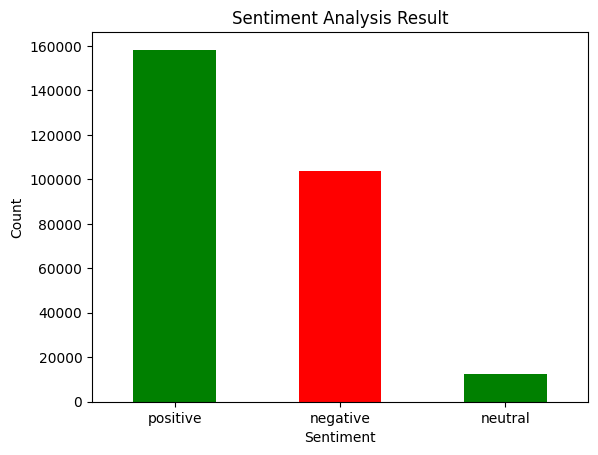

In [47]:
# Plot jumlah sentimen
sentiment_counts.plot(kind="bar", color=["green", "red"])
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Sentiment Analysis Result")
plt.xticks(rotation=0)
plt.show()

In [50]:
stopwords_kustom = {
    "aja", "ga", "gk", "gak", "udah", "udh", "ok", "lah", "sih", "banget", "bgt",
    "cuma", "lagi", "tp", "dr", "krn", "dgn", "yg", "tdk", "blm", "sm", "sdh", "mn", 
    "jg", "sy", "sya", "gw", "gue", "nya", "ya"
}

def bersihkan_teks(teks):
    if isinstance(teks, str):
        teks = teks.lower() 
        teks = re.sub(r'[^\w\s]', '', teks) 
        kata_kata = word_tokenize(teks) 
        stop_words = set(stopwords.words('indonesian')) 
        stop_words.update(stopwords_kustom)
        kata_kata = [kata for kata in kata_kata if kata not in stop_words]
        return kata_kata
    # If teks is not a string, return an empty list or handle it as needed
    else:
        return []

df['Kata_Bersih'] = df['Komentar'].apply(bersihkan_teks)


In [ ]:
print(df.isna().sum())
print(df.isnull().sum())

Nama           0
Rating         0
Komentar       0
Tanggal        0
Sentiment      0
Kata_Bersih    0
dtype: int64
Nama           0
Rating         0
Komentar       0
Tanggal        0
Sentiment      0
Kata_Bersih    0
dtype: int64


In [ ]:
df["Kata_Bersih"] = df["Kata_Bersih"].apply(lambda x: " ".join(x) if isinstance(x, list) else str(x))
print(df.duplicated().sum())

0


In [ ]:
# Hitung frekuensi kata untuk setiap sentimen dengan split()
kata_positif = Counter([kata for daftar_kata in df[df['Sentiment'] == 'positive']['Kata_Bersih'] for kata in daftar_kata.split()])
kata_negatif = Counter([kata for daftar_kata in df[df['Sentiment'] == 'negative']['Kata_Bersih'] for kata in daftar_kata.split()])

Visualisasi Kata yang sering muncul

In [ ]:
print("\nKata-kata umum dalam sentimen negatif:")
kata_negatif.most_common(50)


Kata-kata umum dalam sentimen negatif:


[('ovo', 46646),
 ('aplikasi', 24248),
 ('masuk', 17609),
 ('saldo', 17364),
 ('transfer', 14232),
 ('gagal', 10645),
 ('apk', 9326),
 ('akun', 9121),
 ('transaksi', 9111),
 ('uang', 8473),
 ('susah', 8345),
 ('tolong', 8240),
 ('login', 7544),
 ('pake', 7251),
 ('up', 7186),
 ('upgrade', 7007),
 ('top', 6977),
 ('dana', 6395),
 ('bank', 6167),
 ('update', 5803),
 ('pulsa', 5468),
 ('tf', 5364),
 ('proses', 5197),
 ('kecewa', 4927),
 ('gimana', 4662),
 ('email', 4613),
 ('ribet', 4583),
 ('kali', 4507),
 ('cs', 4384),
 ('parah', 4153),
 ('pakai', 4130),
 ('pas', 3956),
 ('isi', 3720),
 ('2', 3625),
 ('buka', 3615),
 ('mulu', 3598),
 ('beli', 3578),
 ('kalo', 3533),
 ('berhasil', 3402),
 ('jam', 3360),
 ('nunggu', 3347),
 ('kode', 3341),
 ('perbaiki', 3328),
 ('1', 3300),
 ('verifikasi', 3295),
 ('admin', 3238),
 ('rekening', 3157),
 ('eror', 3121),
 ('kirim', 3085),
 ('bikin', 3032)]

In [ ]:
print("\nKata-kata umum dalam sentimen positif:")
kata_positif.most_common(50)


Kata-kata umum dalam sentimen positif:


[('ovo', 22462),
 ('mantap', 19448),
 ('bagus', 18104),
 ('membantu', 11844),
 ('mudah', 11163),
 ('good', 9270),
 ('aplikasi', 8138),
 ('cepat', 6610),
 ('transaksi', 6450),
 ('oke', 3648),
 ('top', 3501),
 ('transfer', 3426),
 ('kasih', 3267),
 ('keren', 3046),
 ('gampang', 2463),
 ('semoga', 2417),
 ('pembayaran', 2396),
 ('tolong', 2258),
 ('terimakasih', 2256),
 ('apk', 2234),
 ('bermanfaat', 2178),
 ('suka', 2037),
 ('pake', 2023),
 ('terima', 1933),
 ('masuk', 1910),
 ('memudahkan', 1875),
 ('saldo', 1858),
 ('pakai', 1843),
 ('aman', 1708),
 ('uang', 1701),
 ('lancar', 1680),
 ('akun', 1654),
 ('puas', 1605),
 ('bintang', 1599),
 ('ribet', 1536),
 ('bertransaksi', 1522),
 ('aplikasinya', 1500),
 ('mantab', 1480),
 ('up', 1452),
 ('bank', 1436),
 ('praktis', 1425),
 ('nice', 1356),
 ('terbaik', 1276),
 ('memuaskan', 1249),
 ('best', 1235),
 ('mantul', 1217),
 ('proses', 1183),
 ('sukses', 1177),
 ('mohon', 1154),
 ('bayar', 1129)]

C:\Users\Sinta\AppData\Local\Temp\ipykernel_27548\1882581297.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Kata', data=df_positif, palette='Blues_r')
C:\Users\Sinta\AppData\Local\Temp\ipykernel_27548\1882581297.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frekuensi', y='Kata', data=df_negatif, palette='Reds_r')


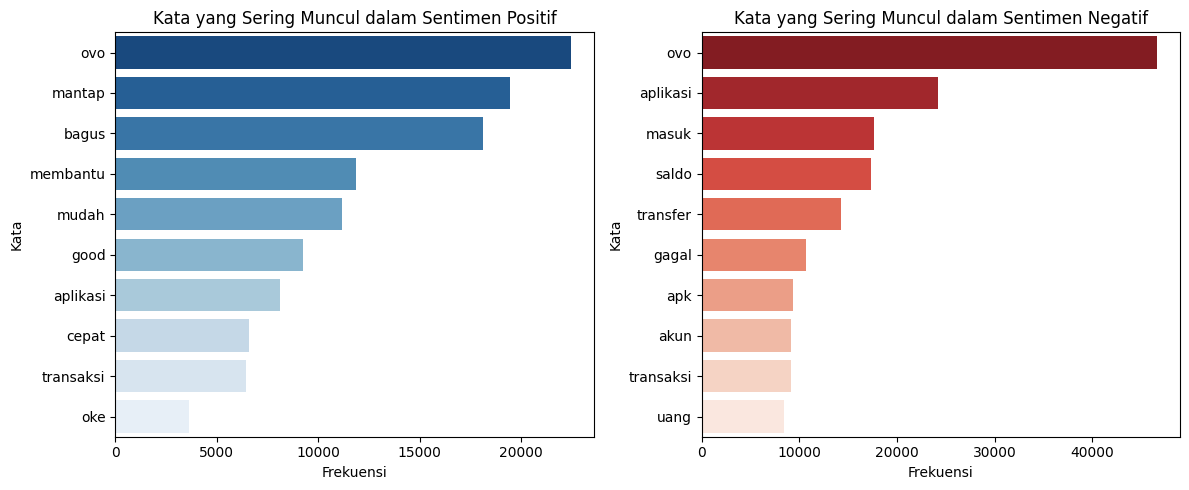

In [ ]:
# Konversi ke DataFrame untuk visualisasi
df_positif = pd.DataFrame(kata_positif.most_common(10), columns=['Kata', 'Frekuensi'])
df_negatif = pd.DataFrame(kata_negatif.most_common(10), columns=['Kata', 'Frekuensi'])

# Plot bar chart untuk kata-kata dalam sentimen positif
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(x='Frekuensi', y='Kata', data=df_positif, palette='Blues_r')
plt.title('Kata yang Sering Muncul dalam Sentimen Positif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')

# Plot bar chart untuk kata-kata dalam sentimen negatif
plt.subplot(1, 2, 2)
sns.barplot(x='Frekuensi', y='Kata', data=df_negatif, palette='Reds_r')
plt.title('Kata yang Sering Muncul dalam Sentimen Negatif')
plt.xlabel('Frekuensi')
plt.ylabel('Kata')

# Tampilkan plot
plt.tight_layout()
plt.show()

In [ ]:
# Ubah kolom Tanggal menjadi format datetime
df["Tanggal"] = pd.to_datetime(df["Tanggal"])

# Mengelompokkan jumlah komentar berdasarkan tanggal
df_grouped = df.groupby(df["Tanggal"].dt.date).size().reset_index(name="Jumlah Komentar")

# Menampilkan tabel hasil
print(df_grouped)

         Tanggal  Jumlah Komentar
0     2021-01-06               44
1     2021-01-07              200
2     2021-01-08              161
3     2021-01-09              167
4     2021-01-10              122
...          ...              ...
1515  2025-03-23              109
1516  2025-03-24              108
1517  2025-03-25              413
1518  2025-03-26              171
1519  2025-03-27               67

[1520 rows x 2 columns]


In [ ]:
df['Kata_Bersih'] = df['Kata_Bersih'].astype(str)

# Mengecek jumlah data yang duplikat
df.duplicated().sum()

0

### Ekstraksi Fitur (Feature Engineering)

#### TF-IDF (Term Frequency - Inverse Documents Frequency)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Target label (sentimen)
y = df["Sentiment"].map({"positive": 1, "negative": 0})
y = y.dropna()
df = df.loc[y.index] 

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(df["Kata_Bersih"]).toarray()


# Lihat fitur TF-IDF
print(tfidf_vectorizer.get_feature_names_out()[:20])


['10' '100' '1000' '100rb' '10k' '10x' '12' '15' '1500' '1x' '1x24' '20'
 '24' '24jam' '2500' '2hari' '2x' '30' '3hari' '3x']


In [ ]:
import pickle

# Simpan TF-IDF vectorizer
with open("models/tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

### Word to Vectors (Word2vec)

In [ ]:
import gensim
from gensim.models import Word2Vec

# Tokenisasi teks menjadi list kata
df["Kata_Token"] = df["Kata_Bersih"].apply(lambda x: x.split())

# Pelatihan model Word2Vec
model_w2v = Word2Vec(sentences=df["Kata_Token"], vector_size=100, window=5, min_count=1, workers=4)

# Fungsi untuk mendapatkan vektor kalimat dengan merata-rata vektor kata
def get_sentence_vector(sentence, model):
    words = sentence.split()
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)

# Transformasi teks menjadi vektor Word2Vec
X_w2v = np.array([get_sentence_vector(text, model_w2v) for text in df["Kata_Bersih"]])


In [ ]:
# Simpan model Word2Vec ke file
model_w2v.save("model_w2v.model")

### Modelling Dengan Machine Learning atau Deep Learning

#### Splitting data

In [51]:
from sklearn.model_selection import train_test_split

X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
# Pembagian data menjadi training dan testing
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_w2v, y, test_size=0.2, random_state=42)

### Melatih Model Machine Learning

#### Model Naive Bayes

In [52]:
from sklearn.naive_bayes import MultinomialNB

# Buat model Naive Bayes
model_nb = MultinomialNB(alpha=5.0)
model_nb.fit(X_train_tf, y_train_tf)

MultinomialNB(alpha=5.0)

Evaluasi model Naive Bayes

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Prediksi pada data uji
y_pred = model_nb.predict(X_test_tf)
# Evaluasi performa model
# print("Akurasi Training:", accuracy_score(y_train_tf, ))
print("Akurasi Testing:", accuracy_score(y_test_tf, y_pred))
print("Laporan Klasifikasi:\n", classification_report(y_test_tf, y_pred))

Akurasi Testing: 0.9061451022276472
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.86      0.91      0.89     20820
           1       0.94      0.90      0.92     31612

    accuracy                           0.91     52432
   macro avg       0.90      0.91      0.90     52432
weighted avg       0.91      0.91      0.91     52432



Confussion Matriks Naive Bayes

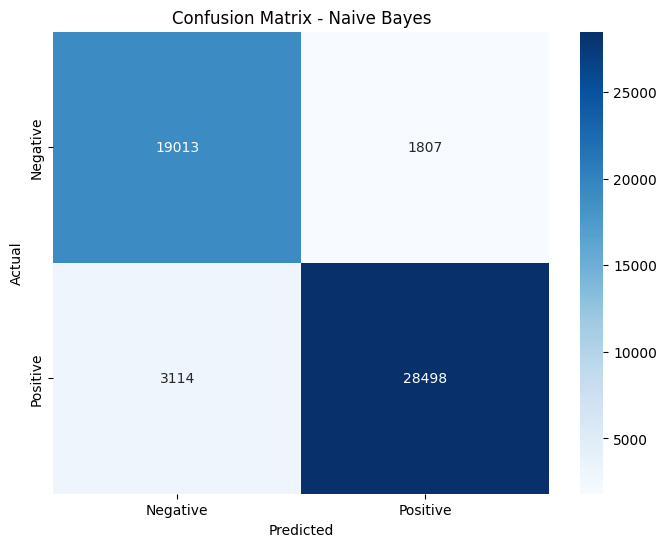

In [ ]:
conf_matrix = confusion_matrix(y_test_tf, y_pred)

# Plot confussion matriks
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

Testing model Naive Bayes

In [ ]:
komentar_baru = ["Aplikasinya jelek, pelayannanya kurang!", "Saya sangat puas dengan pelayanannya."]

# Bersihkan teks & gabungkan kembali ke string
komentar_baru_bersih = [' '.join(bersihkan_teks(k)) for k in komentar_baru]

# Transformasi ke TF-IDF
X_baru = tfidf_vectorizer.transform(komentar_baru_bersih)

# Prediksi Sentimen
prediksi = model_nb.predict(X_baru)

# Tampilkan hasil
for komentar, sentimen in zip(komentar_baru, prediksi):
    print(f"Komentar: {komentar} → Sentimen: {'Positif' if sentimen == 1 else 'Negatif'}")


Komentar: Aplikasinya jelek, pelayannanya kurang! → Sentimen: Negatif
Komentar: Saya sangat puas dengan pelayanannya. → Sentimen: Positif


In [53]:
import joblib

# Simpan model ke file
joblib.dump(model_nb, 'models/model_naive_bayes.pkl')

['models/model_naive_bayes.pkl']

#### Model Linear Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression(max_iter=500, C=10, solver= "saga", class_weight="balanced")
model_lr.fit(X_train_tf, y_train_tf)
y_pred_lr = model_lr.predict(X_test_tf)

Evaluasi Model Logistic Regression

In [ ]:
# Evaluasi performa model
print("Akurasi:", accuracy_score(y_test_tf, y_pred_lr))
print("Laporan Klasifikasi:\n", classification_report(y_test_tf, y_pred_lr))

Akurasi: 0.9098832773878548
Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.86      0.92      0.89     20820
           1       0.95      0.90      0.92     31612

    accuracy                           0.91     52432
   macro avg       0.90      0.91      0.91     52432
weighted avg       0.91      0.91      0.91     52432



Confussion Matrix Logistic Regression

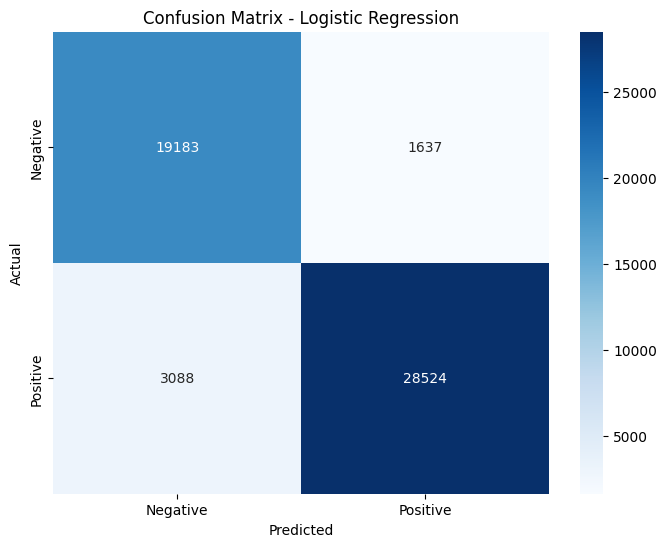

In [ ]:
# Confussion matriks Logistic Regression
conf_matrix_lr = confusion_matrix(y_test_tf, y_pred_lr)

# Plot confussion matriks
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

Testing model Logistic Regression

In [ ]:
komentar_baru = ["Uang yang saya transfer telat terkirim", "Cepat banget kalo soal transfer", "aplikasinya bagus cuyy!", "Csnya gak bener sumpah, lama banget pelayanannya"]

# Bersihkan teks & gabungkan kembali ke string
komentar_baru_bersih = [' '.join(bersihkan_teks(k)) for k in komentar_baru]

# Transformasi ke TF-IDF
X_baru = tfidf_vectorizer.transform(komentar_baru_bersih)

# Prediksi Sentimen
prediksi = model_lr.predict(X_baru)

# Tampilkan hasil
for komentar, sentimen in zip(komentar_baru, prediksi):
    print(f"Komentar: {komentar} → Sentimen: {'Positif' if sentimen == 1 else 'Negatif'}")

Komentar: Uang yang saya transfer telat terkirim → Sentimen: Negatif
Komentar: Cepat banget kalo soal transfer → Sentimen: Positif
Komentar: aplikasinya bagus cuyy! → Sentimen: Positif
Komentar: Csnya gak bener sumpah, lama banget pelayanannya → Sentimen: Negatif


In [ ]:
# Simpan model ke file
joblib.dump(model_lr, 'models/model_logistic_regression.pkl')

['models/model_logistic_regression.pkl']

#### Model MLP

In [ ]:
# Model MLP
from sklearn.neural_network import MLPClassifier

# Buat model MLP
model_mlp = MLPClassifier(
    hidden_layer_sizes=(32, 16),
    activation='relu',
    solver='adam',
    alpha=0.5,
    batch_size=16,
    learning_rate='adaptive',
    learning_rate_init=0.0001,
    max_iter=100,
    early_stopping=True,
    n_iter_no_change=10,
    random_state=42
)
model_mlp.fit(X_train_w2v, y_train_w2v)

MLPClassifier(alpha=0.5, batch_size=16, early_stopping=True,
              hidden_layer_sizes=(32, 16), learning_rate='adaptive',
              learning_rate_init=0.0001, max_iter=100, random_state=42)

Evaluasi Model MLP

In [ ]:
# Evaluasi performa model
y_pred_mlp = model_mlp.predict(X_test_w2v)
print("Akurasi:", accuracy_score(y_test_w2v, y_pred_mlp))
print("Laporan Klasifikasi:\n", classification_report(y_test_w2v, y_pred_mlp))

Akurasi: 0.8956553249923711
Laporan Klasifikasi:
               precision    recall  f1-score   support

         0.0       0.85      0.90      0.87     20820
         1.0       0.93      0.89      0.91     31612

    accuracy                           0.90     52432
   macro avg       0.89      0.90      0.89     52432
weighted avg       0.90      0.90      0.90     52432



Confusion Matrix model MLP

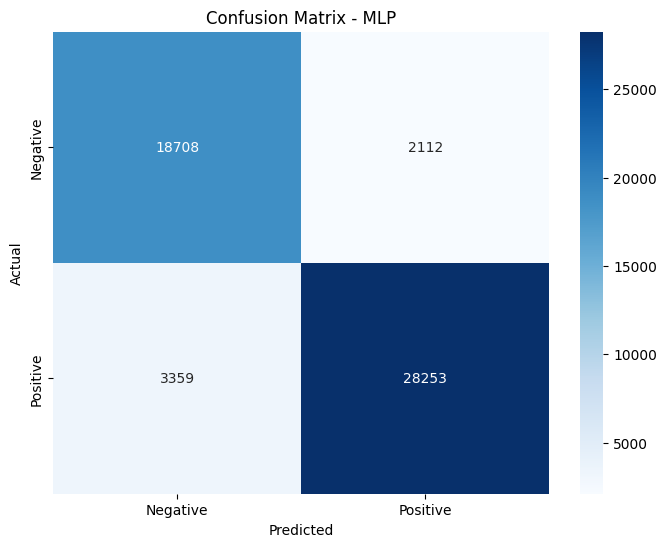

In [ ]:
# Confussion matriks mlp
conf_matrix_mlp = confusion_matrix(y_test_w2v, y_pred_mlp)

# Plot confussion matriks
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_mlp, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - MLP')
plt.show()

Testing model MLP

In [ ]:
new_texts = ["Pelayanan yang sangat baik!", 
             "jelek bnaget aplikasinya!."]
# Ubah teks menjadi vektor Word2Vec

X_new_w2v = np.array([get_sentence_vector(text, model_w2v) for text in new_texts])

# Prediksi dengan model yang telah dilatih
predictions = model_mlp.predict(X_new_w2v)

# Konversi hasil sigmoid menjadi label (0 atau 1)
predicted_labels = (predictions > 0.5).astype(int)

# Menampilkan hasil prediksi
for text, label in zip(new_texts, predicted_labels):
    sentiment = "Positif" if label == 1 else "Negatif"
    print(f"Teks: {text} -> Sentimen: {sentiment}")

Teks: Pelayanan yang sangat baik! -> Sentimen: Positif
Teks: jelek bnaget aplikasinya!. -> Sentimen: Negatif


In [ ]:
# Simpan model MLP ke file
joblib.dump(model_mlp, 'models/model_mlp.pkl')

['models/model_mlp.pkl']

### Melatih Model dengan Deep Learning

In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

In [ ]:
def create_cnn_lstm_model(input_shape):
    model = models.Sequential()
    
    # CNN Layer
    model.add(layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling1D(pool_size=2))
    
    # LSTM Layer
    model.add(layers.LSTM(64))
    
    # Fully Connected Layer
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dropout(0.3))
    
    # Output Layer
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # Compile
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

cnn_lstm_model = create_cnn_lstm_model((X_train_w2v.shape[1], 1))
cnn_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 98, 64)            256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 49, 64)           0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                        

In [ ]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-3, verbose=1)

# Latih model
history = cnn_lstm_model.fit(
    X_train_w2v, y_train_w2v,
    epochs=20,
    batch_size=32,
    validation_data=(X_test_w2v, y_test_w2v),
    callbacks=[lr_scheduler],
    verbose=1
    
)

Epoch 1/20
6554/6554 [==============================] - 552s 83ms/step - loss: 0.2888 - accuracy: 0.8925 - val_loss: 0.2589 - val_accuracy: 0.9034 - lr: 0.0010
Epoch 2/20
6554/6554 [==============================] - 556s 85ms/step - loss: 0.2568 - accuracy: 0.9053 - val_loss: 0.2503 - val_accuracy: 0.9050 - lr: 0.0010
Epoch 3/20
6554/6554 [==============================] - 579s 88ms/step - loss: 0.2489 - accuracy: 0.9080 - val_loss: 0.2473 - val_accuracy: 0.9057 - lr: 0.0010
Epoch 4/20
6554/6554 [==============================] - 565s 86ms/step - loss: 0.2441 - accuracy: 0.9099 - val_loss: 0.2421 - val_accuracy: 0.9086 - lr: 0.0010
Epoch 5/20
6554/6554 [==============================] - 519s 79ms/step - loss: 0.2412 - accuracy: 0.9114 - val_loss: 0.2414 - val_accuracy: 0.9084 - lr: 0.0010
Epoch 6/20
6554/6554 [==============================] - 380s 58ms/step - loss: 0.2382 - accuracy: 0.9123 - val_loss: 0.2391 - val_accuracy: 0.9087 - lr: 0.0010
Epoch 7/20
6554/6554 [==================

In [ ]:
loss, accuracy = cnn_lstm_model.evaluate(X_test_w2v, y_test_w2v)
print(f"Test Accuracy: {accuracy:.4f}")

1639/1639 [==============================] - 33s 20ms/step - loss: 0.2480 - accuracy: 0.9108
Test Accuracy: 0.9108


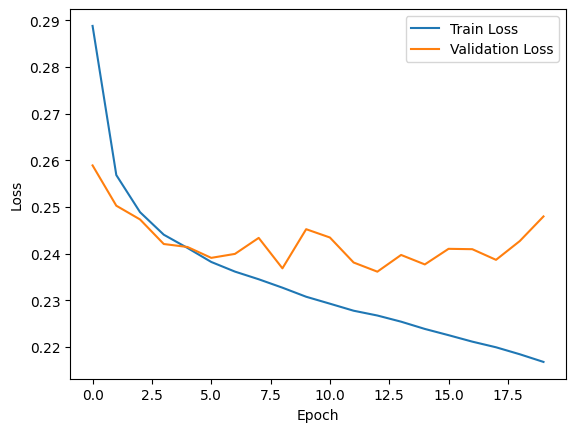

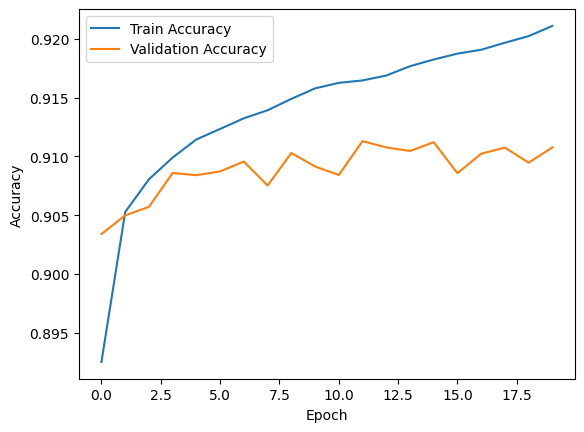

In [ ]:
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Prediksi probabilitas
y_pred_prob = cnn_lstm_model.predict(X_test_w2v)

# Konversi probabilitas ke kelas biner (0 atau 1)
y_pred_cnn_lstm = (y_pred_prob > 0.5).astype(int)

# Classification Report
print("Laporan Klasifikasi:\n", classification_report(y_test_w2v, y_pred_cnn_lstm))

1639/1639 [==============================] - 36s 20ms/step
Laporan Klasifikasi:
               precision    recall  f1-score   support

         0.0       0.86      0.92      0.89     20820
         1.0       0.95      0.90      0.92     31612

    accuracy                           0.91     52432
   macro avg       0.90      0.91      0.91     52432
weighted avg       0.91      0.91      0.91     52432



Confusion Matrix model CNN dengan LSTM

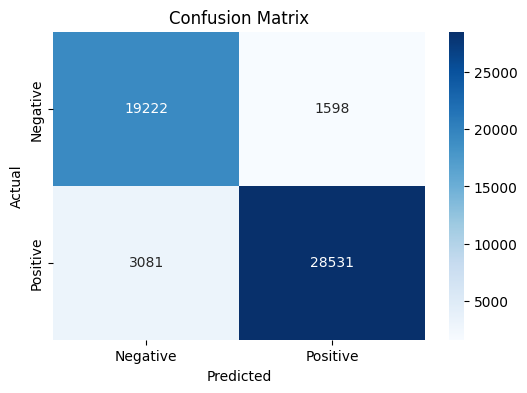

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test_w2v, y_pred_cnn_lstm)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Testing model CNN dengan LSTM

In [ ]:
new_texts = ["Pelayanan yang sangat baik!", 
             "jelek banget aplikasinya!."]
# Ubah teks menjadi vektor Word2Vec

X_new_w2v = np.array([get_sentence_vector(text, model_w2v) for text in new_texts])

# Prediksi dengan model yang telah dilatih
predictions = cnn_lstm_model.predict(X_new_w2v)

# Konversi hasil sigmoid menjadi label (0 atau 1)
predicted_labels = (predictions > 0.5).astype(int)

# Menampilkan hasil prediksi
for text, label in zip(new_texts, predicted_labels):
    sentiment = "Positif" if label == 1 else "Negatif"
    print(f"Teks: {text} -> Sentimen: {sentiment}")

1/1 [==============================] - 0s 60ms/step
Teks: Pelayanan yang sangat baik! -> Sentimen: Positif
Teks: jelek banget aplikasinya!. -> Sentimen: Negatif


In [ ]:
cnn_lstm_model.save('models/cnn_lstm_model.h5')

#### Model CNN dan LSTM dengan KERAS TUNER

In [ ]:
def build_model(hp):
    model = models.Sequential()

    # CNN Layer
    model.add(layers.Conv1D(
        filters=hp.Int('filters', min_value=32, max_value=128, step=32),
        kernel_size=hp.Int('kernel_size', min_value=3, max_value=5, step=1),
        activation='relu',
        input_shape=(X_train_w2v.shape[1], 1)
    ))
    model.add(layers.MaxPooling1D(pool_size=2))

    # LSTM Layer
    model.add(layers.LSTM(
        hp.Int('lstm_units', min_value=32, max_value=128, step=32)
    ))

    # Fully Connected Layer
    model.add(layers.Dense(
        units=hp.Int('dense_units', min_value=16, max_value=64, step=16),
        activation='relu'
    ))
    model.add(layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))

    # Output Layer
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile Model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[0.001, 0.0005, 0.0001])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

In [ ]:
from keras_tuner.tuners import RandomSearch

# Inisialisasi tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory='tuner_results',  
    project_name='cnn_lstm_tuning'
)

# Menjalankan tuning
tuner.search(
    X_train_w2v, y_train_w2v,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_w2v, y_test_w2v),
    verbose=1
)

Reloading Tuner from tuner_results\cnn_lstm_tuning\tuner0.json


In [ ]:
# Menampilkan hasil tuning
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"""
Optimal Parameters:
- Filters: {best_hps.get('filters')}
- Kernel Size: {best_hps.get('kernel_size')}
- LSTM Units: {best_hps.get('lstm_units')}
- Dense Units: {best_hps.get('dense_units')}
- Dropout: {best_hps.get('dropout')}
- Learning Rate: {best_hps.get('learning_rate')}
""")

# Menggunakan model terbaik
best_model = tuner.get_best_models(num_models=1)[0]

# Melihat ringkasan model terbaik
best_model.summary()



Optimal Parameters:
- Filters: 128
- Kernel Size: 5
- LSTM Units: 96
- Dense Units: 64
- Dropout: 0.30000000000000004
- Learning Rate: 0.0005

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 496, 128)          768       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 248, 128)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 96)                86400     
                                                                 
 dense (Dense)               (None, 64)                6208      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                            

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, Callback

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True, verbose=1)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-6, verbose=1)

class StopAtAccuracy(Callback):
    def __init__(self, target_acc=0.93):
        super(StopAtAccuracy, self).__init__()
        self.target_acc = target_acc

    def on_epoch_end(self, epoch, logs=None):
        acc = logs.get("val_accuracy")
        if acc is not None and acc >= self.target_acc:
            print(f"\n✅ Target val_accuracy {self.target_acc*100:.2f}% tercapai, menghentikan training...")
            self.model.stop_training = True

In [ ]:
stop_acc_callback = StopAtAccuracy(target_acc=0.93)

# Latih model dengan hyperparameter terbaik
history = best_model.fit(
    X_train_w2v, y_train_w2v,
    epochs=30,
    batch_size=32,
    validation_data=(X_test_w2v, y_test_w2v),
    verbose=1,
    callbacks=[early_stop, lr_scheduler, stop_acc_callback]
)

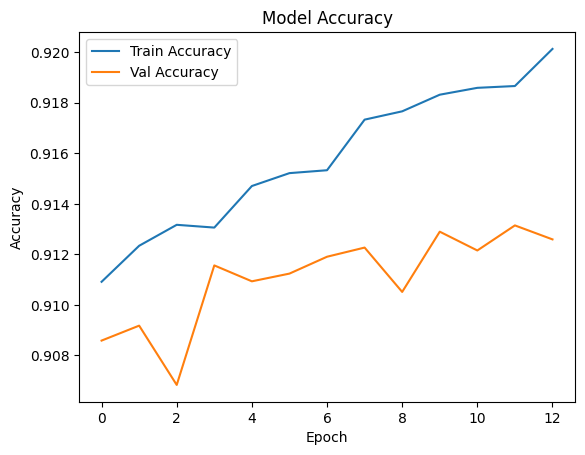

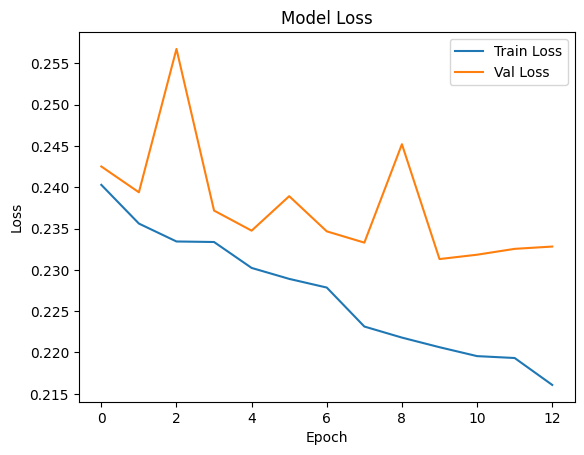

In [ ]:
# Plot akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Evaluasi model di data test
loss, accuracy = best_model.evaluate(X_test_w2v, y_test_w2v)
print(f"Test Accuracy: {accuracy:.4f}")


1639/1639 [==============================] - 440s 268ms/step - loss: 0.2313 - accuracy: 0.9129
Test Accuracy: 0.9129


1639/1639 [==============================] - 562s 340ms/step
Classification Report:
               precision    recall  f1-score   support

         0.0       0.87      0.92      0.89     20820
         1.0       0.95      0.91      0.93     31612

    accuracy                           0.91     52432
   macro avg       0.91      0.91      0.91     52432
weighted avg       0.91      0.91      0.91     52432



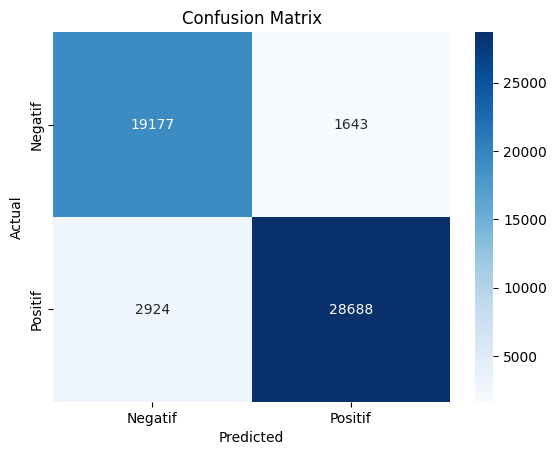

In [ ]:
# Prediksi
y_pred_prob = best_model.predict(X_test_w2v)
y_pred = (y_pred_prob > 0.5).astype(int)

# Laporan klasifikasi
print("Classification Report:\n", classification_report(y_test_w2v, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_w2v, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
new_texts = ["Aplikasinya memudahkan transfer banget", 
             "setiap tf kena biaya admin, rugi banget"]
# Ubah teks menjadi vektor Word2Vec

X_new_w2v = np.array([get_sentence_vector(text, model_w2v) for text in new_texts])

# Prediksi dengan model yang telah dilatih
predictions = best_model.predict(X_new_w2v)

# Konversi hasil sigmoid menjadi label (0 atau 1)
predicted_labels = (predictions > 0.5).astype(int)

# Menampilkan hasil prediksi
for text, label in zip(new_texts, predicted_labels):
    sentiment = "Positif" if label == 1 else "Negatif"
    print(f"Teks: {text} -> Sentimen: {sentiment}")

1/1 [==============================] - 0s 234ms/step
Teks: Aplikasinya memudahkan transfer banget -> Sentimen: Positif
Teks: setiap tf kena biaya admin, rugi banget -> Sentimen: Negatif


##### paramater best model

In [ ]:
from tensorflow.keras import optimizers

def create_best_cnn_lstm_model(input_shape):
    model = models.Sequential()

    # CNN Layer
    model.add(layers.Conv1D(
        filters=128,
        kernel_size=5,
        activation='relu',
        input_shape=input_shape
    ))
    model.add(layers.MaxPooling1D(pool_size=2))

    # LSTM Layer
    model.add(layers.LSTM(96))

    # Fully Connected Layer
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.3))

    # Output Layer
    model.add(layers.Dense(1, activation='sigmoid'))

    # Compile Model
    optimizer = optimizers.Adam(learning_rate=0.0005)
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


In [ ]:
best_cnn_lstm_model = create_best_cnn_lstm_model((X_train_w2v.shape[1], 1))
best_cnn_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 96, 128)           768       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 48, 128)          0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 96)                86400     
                                                                 
 dense (Dense)               (None, 64)                6208      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                        

In [ ]:
stop_acc_callback = StopAtAccuracy(target_acc=0.95)

history = best_cnn_lstm_model.fit(
    X_train_w2v, y_train_w2v,
    validation_data=(X_test_w2v, y_test_w2v),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, lr_scheduler, stop_acc_callback],
    verbose=1
)


Epoch 1/50
6554/6554 [==============================] - 708s 107ms/step - loss: 0.2856 - accuracy: 0.8903 - val_loss: 0.2578 - val_accuracy: 0.9013 - lr: 5.0000e-04
Epoch 2/50
6554/6554 [==============================] - 792s 121ms/step - loss: 0.2531 - accuracy: 0.9058 - val_loss: 0.2597 - val_accuracy: 0.9046 - lr: 5.0000e-04
Epoch 3/50
6554/6554 [==============================] - 816s 125ms/step - loss: 0.2457 - accuracy: 0.9084 - val_loss: 0.2443 - val_accuracy: 0.9069 - lr: 5.0000e-04
Epoch 4/50
6554/6554 [==============================] - 824s 126ms/step - loss: 0.2416 - accuracy: 0.9100 - val_loss: 0.2456 - val_accuracy: 0.9073 - lr: 5.0000e-04
Epoch 5/50
6554/6554 [==============================] - 852s 130ms/step - loss: 0.2386 - accuracy: 0.9113 - val_loss: 0.2430 - val_accuracy: 0.9086 - lr: 5.0000e-04
Epoch 6/50
6554/6554 [==============================] - 877s 134ms/step - loss: 0.2361 - accuracy: 0.9123 - val_loss: 0.2387 - val_accuracy: 0.9097 - lr: 5.0000e-04
Epoch 7/50

In [ ]:
# Evaluasi di data testing
loss, accuracy = best_cnn_lstm_model.evaluate(X_test_w2v, y_test_w2v, verbose=0)
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test Loss: {loss:.4f}")

Test Accuracy: 0.9124
Test Loss: 0.2339


1639/1639 [==============================] - 64s 38ms/step


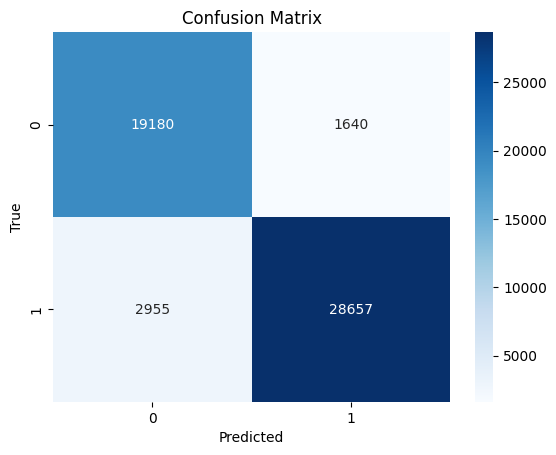

              precision    recall  f1-score   support

     Negatif       0.87      0.92      0.89     20820
     Positif       0.95      0.91      0.93     31612

    accuracy                           0.91     52432
   macro avg       0.91      0.91      0.91     52432
weighted avg       0.91      0.91      0.91     52432



In [ ]:
# Prediksi
y_pred_best = (best_cnn_lstm_model.predict(X_test_w2v) > 0.5).astype(int)

# Confusion Matrix
cm = confusion_matrix(y_test_w2v, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print(classification_report(y_test_w2v, y_pred_best, target_names=["Negatif", "Positif"]))


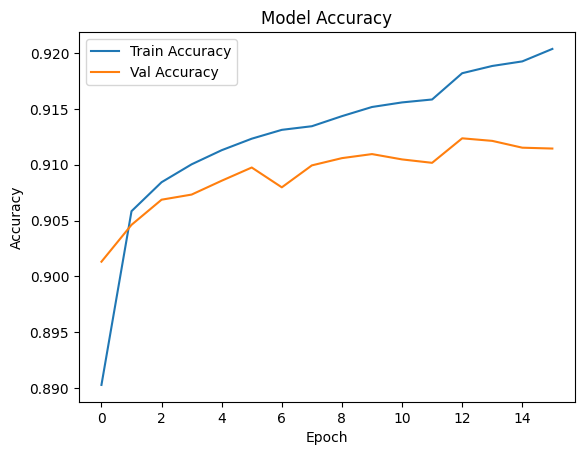

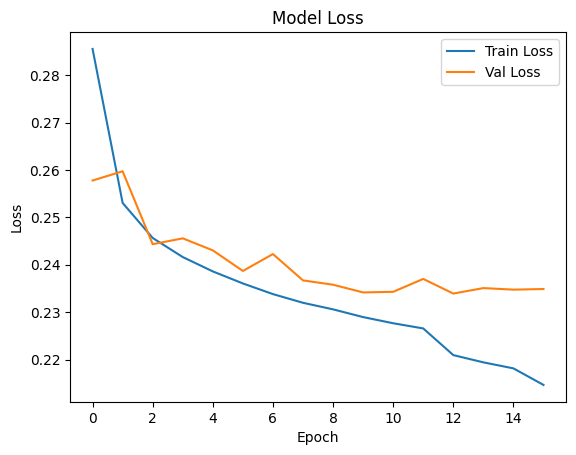

In [ ]:
# Plot akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [49]:
best_cnn_lstm_model.save('models/best_cnn_lstm_model.h5')